In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def scatter_2class(X, y, ylabels =['y=0','y=1'], alpha = 0.8, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap ='bwr',s = 8, alpha = alpha, edgecolors = 'none')
    ax.legend(scatter.legend_elements()[0],ylabels , loc="lower right", title="Classes")
def plot_classification_region(X_test, model,  alpha = 0.5):
    xx1, xx2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    XX = np.c_[xx1.ravel(), xx2.ravel()]
    YY = model.predict(XX)
    y_predict = model.predict(X_test)
    fig, ax = plt.subplots()
    scatter_2class(XX, YY, ax = ax, alpha = alpha)
    scatter_2class(X_test, y_predict, ax = ax)


# Generate Data 

We use a two-class toy dataset generated with the "make_moons" function from the scikit-learn library.
## Preprocessing
- Nomarlize data
We normalize the data using $\frac{X-\mu}{\sigma}$. 
For this, we use `StandardScaler` to ensure scaling the data. 

- Additionally, we randomly separate the dataset into training and testing sets using the `train_test_split` function.

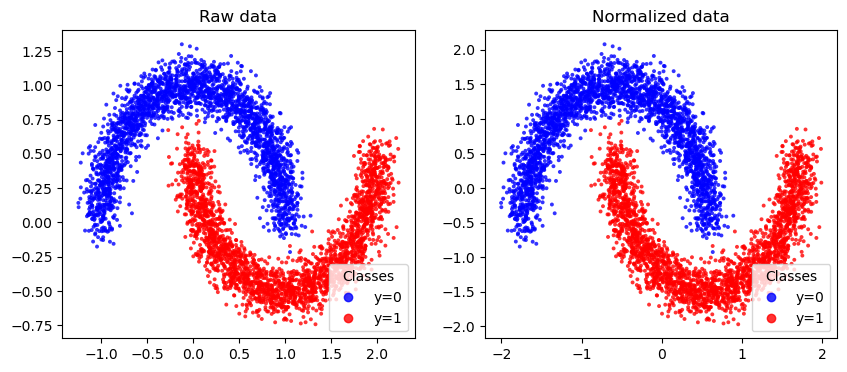

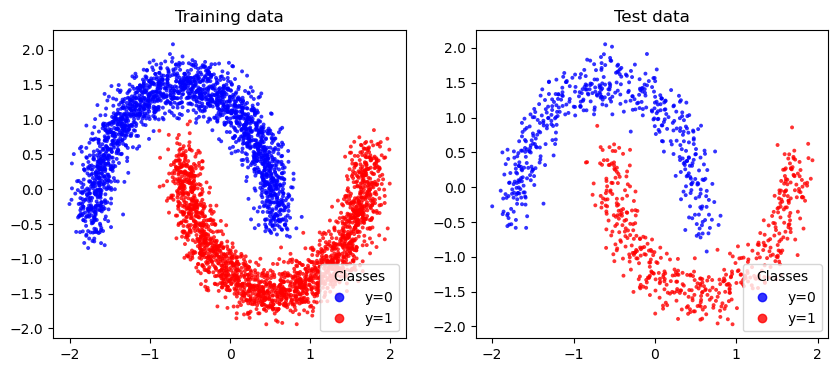

In [3]:
X,y = make_moons(noise=0.1, random_state=0,n_samples = 5000)

from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize = (10,4))
scatter_2class(X,y, ax = axs[0])
axs[0].set_title('Raw data')
scatter_2class(X_norm, y, ax = axs[1])
axs[1].set_title('Normalized data')
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

fig, axs = plt.subplots(1, 2, figsize = (10,4))
scatter_2class(X_train,y_train, ax = axs[0])
axs[0].set_title('Training data')
scatter_2class(X_test, y_test, ax = axs[1])
axs[1].set_title('Test data')
plt.show()

# Logistic regression

### Sigmoid function

### Loss function: Cross-Entropy Error function 
$$ E(w) = -\sum_{n=1}^N \{t_n\ln y_n + (1-t_n) \ln (1-y_n)\} \ (4.90)$$

### Gradient Descent to find w 

$$ w^{new} = w^{old}-H^{-1}  \nabla E(w) (4.92)$$

where $H$ is the Hessian matrix. 

You can also use the simple version: 

$$ w^{new} = w^{old}-\eta  \nabla E(w)  \ (3.22)$$
where $\eta$ is a pre-defined learning rate. 

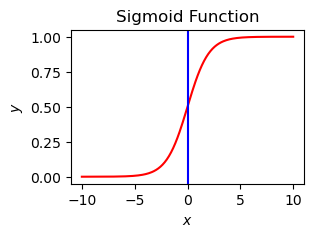

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def plot_sigmoide():
    x = np.linspace(-10,10,200)
    y = sigmoid(x)
    fig, ax = plt.subplots(figsize = (3,2))
    ax.plot(x,y,'r')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.vlines(x = 0, ymin = -0.05, ymax = 1.05, colors = 'b')
    # ax.hlines(y = 0.5, xmin = -10.5, xmax = 10.5, colors = 'b')
    ax.set_ylim([-0.05,1.05])
    ax.set_title('Sigmoid Function')
    plt.show()
plot_sigmoide()

In [5]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=True):
        self.lr = lr # learning rate 
        self.num_iter = num_iter # number of iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        # X.shape: (n_samples, n_features)
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # weights initialization
        self.w = np.zeros(X.shape[1])
        
        # Gradient desencent to find w
        
        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.w -= self.lr * gradient
            
            z = np.dot(X, self.w)
            h = self.sigmoid(z)
            loss = self.loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.sigmoid(np.dot(X, self.w))
    
    def predict(self, X):
        return self.predict_prob(X).round()

loss: 0.690903405511619 	
loss: 0.25478869526739895 	
loss: 0.2546083832370622 	
loss: 0.2546063352677271 	
loss: 0.25460630929329264 	


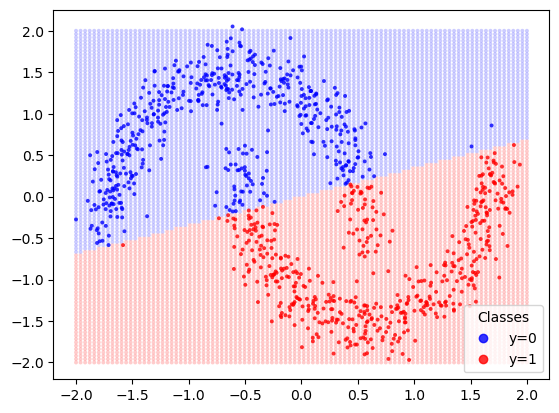

In [6]:

model_lr = LogisticRegression(num_iter=50000,verbose = True)
model_lr.fit(X_train,y_train)
plot_classification_region(X_test, model=model_lr, alpha = 0.2)